# Abalone Case Study

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

From problem statement and feature discription, let's first compute the target varible of the problem 'Age' and assign it to the dataset. Age = 1.5+Rings

In [6]:
# droping Rings column and adding age column of the abalone
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [7]:
# Display the shape of the dataset
print(df.shape)

(4177, 9)


In [8]:
# Display the Datatype of each attribute
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [10]:
# Checking whether we have null or empty data in our dataset
print(df.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64


We dont have null or empty cells in our dataset so no need to apply imputer library to handle Empty Cell or empty values



In [11]:
# Descriptive Statitistics describe each attribute.
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002583C8801F0>,
      dtype=object)

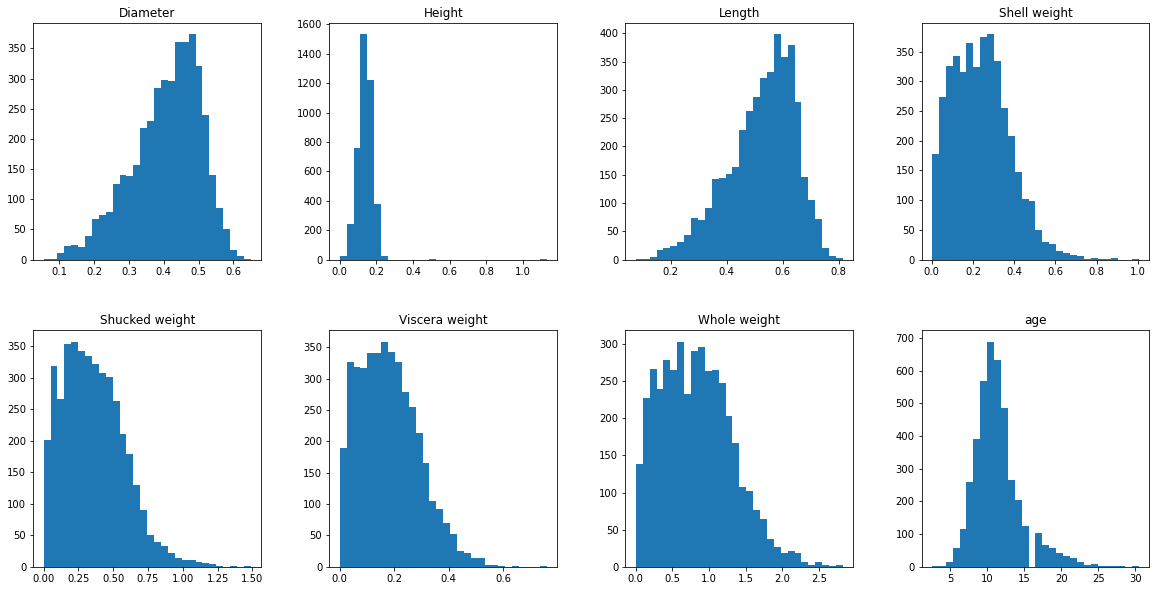

In [12]:
# Histogram visualisation for each attribute to know what kind of distribution it is?
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002583D8D10A0>,
      dtype=object)

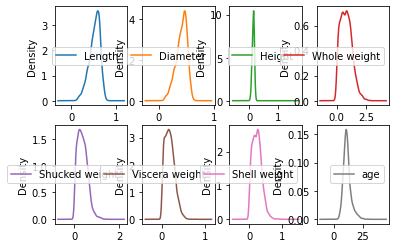

In [13]:
# Density visualisation for all attributes
df.plot(kind='density',layout=(2,4),sharex=False,sharey=False,subplots=True,grid=False)

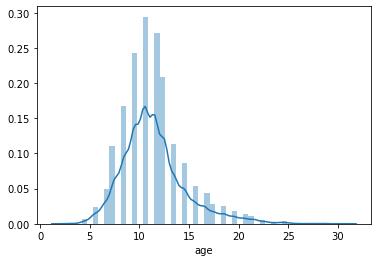

In [14]:
# Histogram Descriptive visualisation distribution for output attribute age

import seaborn as sb
sb.distplot(df['age'])

# Analyzing the correlations with output and each input attribute and find outliers

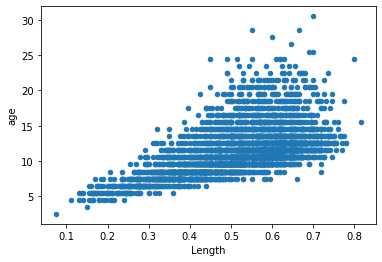

In [15]:
# Histogram visualisation for age output and Longest shell measurement input attributes.

data_plot=pd.concat([df['age'],df['Length']],axis=1)
data_plot.plot.scatter(x='Length',y='age')

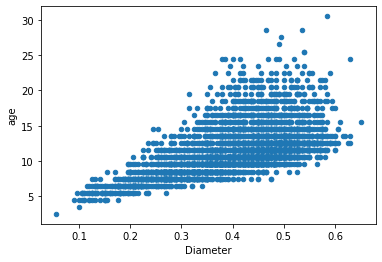

In [16]:
# Histogram visualisation for age output and Diameter input attributes.

data_plot=pd.concat([df['Diameter'],df['age']],axis=1)
data_plot.plot.scatter(x='Diameter',y='age')

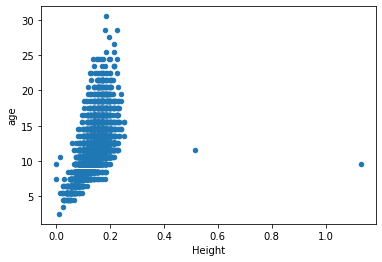

In [17]:
# Histogram visualisation for age output and Height input attributes.

data_plot=pd.concat([df['Height'],df['age']],axis=1)
data_plot.plot.scatter(x='Height',y='age')

# Removing Outlier for age output and Height input attributes

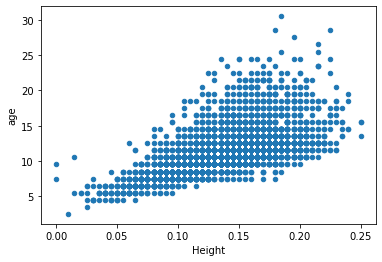

In [18]:
# Removing the outliers values from our dataset
df=df.drop(df[(df['Height']>0.4) & (df['Height']<1.4)].index)

# Visualising again to know those outlier removed or not
data_plot=pd.concat([df['Height'],df['age']],axis=1)
data_plot.plot.scatter(x='Height',y='age')

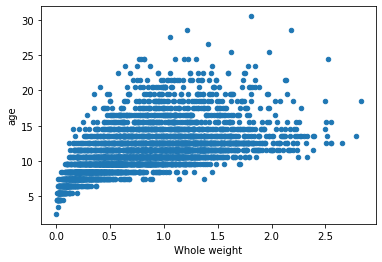

In [19]:
# Histogram visualisation for age output and Whole weight input attributes.

data=pd.concat([df['Whole weight'],df['age']],axis=1)
data.plot.scatter(x='Whole weight',y='age')

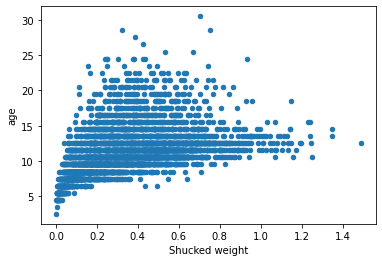

In [20]:
# Histogram visualisation for age output and Shucked weight input attributes.

data=pd.concat([df['Shucked weight'],df['age']],axis=1)
data.plot.scatter(x='Shucked weight',y='age')

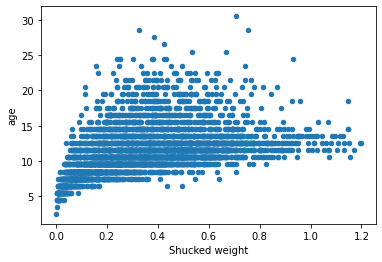

In [22]:
# Removing the outlier values for age output and Shucked weight input attribute.

df=df.drop(df[(df['Shucked weight']>1.2)&(df['Shucked weight']<15)].index)

# Visualising again to know whether those outlier values removed or not
data=pd.concat([df['Shucked weight'],df['age']],axis=1)
data.plot.scatter(x='Shucked weight',y='age')

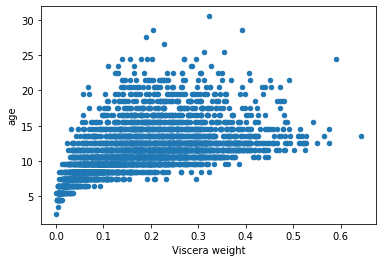

In [23]:
# Histogram visualisation for Viscera weight input attribute and age output attribute.
data=pd.concat([df['Viscera weight'],df['age']],axis=1)
data.plot.scatter(x='Viscera weight',y='age')


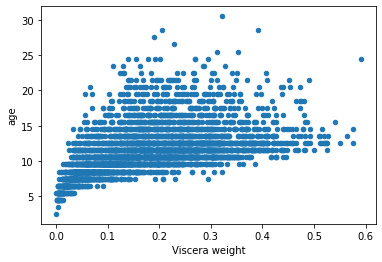

In [24]:
# Removing the outlier value lies in between 0.6 to 15
df=df.drop(df[(df['Viscera weight']>0.6)&(df['Viscera weight']<15)].index)

# Visualising again to check whether those outliers removed or not
data=pd.concat([df['Viscera weight'],df['age']],axis=1)
data.plot.scatter(x='Viscera weight',y='age')

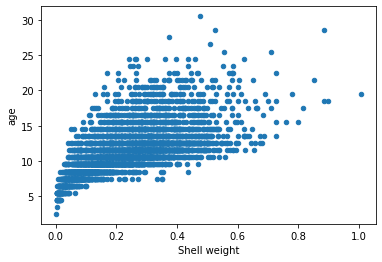

In [25]:
# Histogram Visualisation for Shell weight input attribute and age output attribute.

data=pd.concat([df['Shell weight'],df['age']],axis=1)
data.plot.scatter(x='Shell weight',y='age')

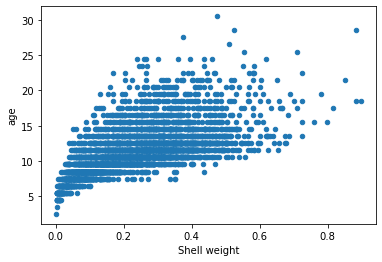

In [26]:
# Removing the outliers for Shell weight input attribute and age output attribute.

df=df.drop(df[(df['Shell weight']>0.9)&(df['Shell weight']<15)].index)

# Visualising again to check all outlier below the threshold removed or not.

data=pd.concat([df['Shell weight'],df['age']],axis=1)
data.plot.scatter(x='Shell weight',y='age')

# Correlation values between each attributes using heatmap.

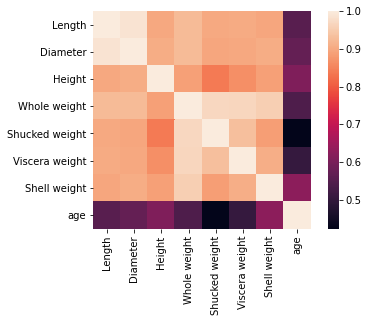

In [28]:
# Correlation value with each attribute using heatmap

import seaborn as sb
correlation_values=df.corr()
sb.heatmap(correlation_values,square=True)

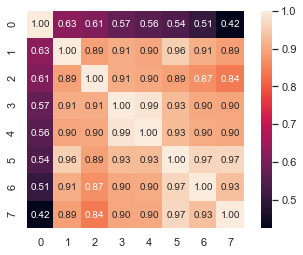

In [29]:
# Zoom in correlation coefficient values in each attribute.

import numpy as np
import matplotlib.pyplot as plt
k=9 #No of Heapmaps values with the best correlation with other variables

# all column  values
cols=df.corr().nlargest(k,'age')['age'].index
# find correlation coefficient values
correlation_coefficient=np.corrcoef(df[cols].values.T)
# column head name values shape
sb.set(font_scale=1.0)
#heat map
sb.heatmap(correlation_coefficient,cbar=True,annot=True,square=True,
           fmt='.2f',annot_kws={'size': 10},xticklabels=True,yticklabels=True)
plt.show()

# Feature Engineering

# Data Cleaning
No need to apply cleaning to our dataset. Because we dont have any error or empty or null values

In [30]:
# Splitting the dataset into input and output attribute.
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Label Encoder

In [31]:
# Encoding the categorical value into numerical values 

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x[:,0]=labelencoder.fit_transform(x[:,0])

# Splitting dataset into training and test set

In [32]:
train_set=0.80
test_set=0.20
seed=5

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_set,test_size=test_set,random_state=seed)

# Classification Modelling

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LinearRegression : -4.857541 (0.499037)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


knn : -5.224915 (0.714804)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVR : -5.412334 (0.514978)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


decision_tree : -9.096939 (1.081556)


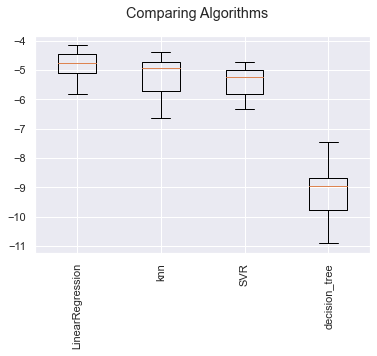

In [33]:
# Spot Checking and Comparing Algorithms Without MinmaxScaler Scaler
n_neighbors=5
models=[]
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
models.append(('LinearRegression',LinearRegression()))
models.append(('knn',KNeighborsRegressor(n_neighbors=n_neighbors)))
models.append(('SVR',SVR()))
models.append(("decision_tree",DecisionTreeRegressor()))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
error='neg_mean_squared_error'
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
axis=fig.add_subplot(111)
plt.boxplot(predictions)
axis.set_xticklabels(names)
plt.xticks(rotation='90')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LinearRegression : -4.857541 (0.499037)
knn : -5.224915 (0.714804)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVR : -5.412334 (0.514978)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


decision_tree : -9.180727 (1.039458)


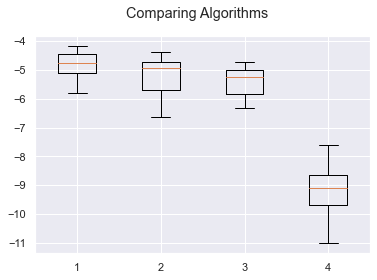

In [34]:
# Spot Checking and Comparing Algorithms With MinmaxScaler Scaler
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import MinMaxScaler
pipelines=[]
pipelines.append(('scaled LinearRegression',Pipeline([('scaler',MinMaxScaler()),('LinearRegression',LinearRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',MinMaxScaler()),('KNN',KNeighborsRegressor(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVR',Pipeline([('scaler',MinMaxScaler()),('SVR',SVR())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',MinMaxScaler()),('decision',DecisionTreeRegressor())])))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

In [38]:
# Linear Regression Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
param_grid=dict()
model=LinearRegression()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: -4.857541 using {} 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [39]:
# KNN Regression Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescalex=scaler.transform(x_train)
n_neighbors=[3,4,5,6,7,8,9,10,15,20]
# With degree our model fit to training set overfitting so better not use for all algorithms except polyomial
#degree=[1,2,3,4,5,6,7,8,9]
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescalex,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best: -5.125680 using {'n_neighbors': 15} 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledAB : -8.118755 (0.644787)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledGBC : -4.820579 (0.617034)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledRFC : -5.149098 (0.540313)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledETC : -5.309948 (0.512934)


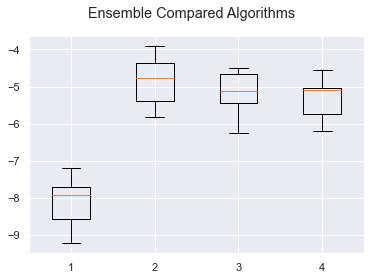

In [40]:
# Ensemble and Boosting algorithm to improve performance

#Ensemble
# Boosting methods
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Bagging methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
ensembles=[]
ensembles.append(('scaledAB',Pipeline([('scale',MinMaxScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('scaledGBC',Pipeline([('scale',MinMaxScaler()),('GBc',GradientBoostingRegressor())])))
ensembles.append(('scaledRFC',Pipeline([('scale',MinMaxScaler()),('rf',RandomForestRegressor(n_estimators=10))])))
ensembles.append(('scaledETC',Pipeline([('scale',MinMaxScaler()),('ETC',ExtraTreesRegressor(n_estimators=10))])))

# Evaluate each Ensemble Techinique
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the compared Ensemble Algorithms
fig=plt.figure()
fig.suptitle('Ensemble Compared Algorithms')
plt.boxplot(results)
plt.show()

In [41]:
# RandomForest Regressor Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[5,10,15,20,25,30,40,50,75,100]
param_grid=dict(n_estimators=n_estimators)
model=RandomForestRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best: -4.829290 using {'n_estimators': 75} 


In [42]:
# Gradient Boosting Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
n_estimators=[10,15,20,25,30,40,50,75,100,150,200]
param_grid=dict(learning_rate=learning_rate,n_estimators=n_estimators)
model=GradientBoostingRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best: -4.813076 using {'learning_rate': 0.1, 'n_estimators': 100} 


In [43]:
# Finalize Model
# we finalized the Random Forest Regressor algorithm and evaluate the model for Abalone Physical meansurements

from sklearn.metrics import mean_squared_error
scaler=MinMaxScaler().fit(x_train)
scaler_x=scaler.transform(x_train)
model=RandomForestRegressor(n_estimators=75)
model.fit(scaler_x,y_train)

#Transform the validation test set data
scaledx_test=scaler.transform(x_test)
y_pred=model.predict(scaledx_test)

accuracy=mean_squared_error(y_test,y_pred)

print("accuracy :",accuracy)

accuracy : 4.6133096438575425
